# Who are better off catholic or non-catholic students? 

We will be looking at different metrics such as parent details, ethnicity, income status and children score.

# Directories, Libraries and Data

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Matching

C:\Users\shrav\Data_Analysis_Projects\Datasets\Matching


In [2]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import scipy.stats as ss

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

import math

In [3]:
# Data 

df = pd.read_csv("school.csv")
df.head()

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0001004C,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0001010C,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,0001011C,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0001012C,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


In [4]:
# Drop childid 
df = df.drop(columns=['childid'])
df.head(1)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753


# Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   catholic             5429 non-null   int64  
 1   race                 5429 non-null   object 
 2   number_places_lived  5429 non-null   int64  
 3   mom_age              5429 non-null   int64  
 4   dad_age              5429 non-null   int64  
 5   dad_education        5429 non-null   object 
 6   mom_education        5429 non-null   object 
 7   mom_score            5429 non-null   float64
 8   dad_score            5429 non-null   float64
 9   income               5429 non-null   float64
 10  poverty              5429 non-null   int64  
 11  food_stamps          5429 non-null   int64  
 12  score_standardized   5429 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 551.5+ KB


No null values 

In [6]:
df.describe().round(2)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
count,5429.00,5429.00,5429.00,5429.00,5429.00,5429.00,5429.00,5429.00,5429.00,5429.00
mean,0.17,1.10,38.13,40.46,44.55,43.16,68954.74,0.09,0.04,0.17
std,0.38,0.34,5.65,6.39,11.49,10.69,43411.27,0.28,0.19,0.96
min,0.00,1.00,19.00,22.00,29.60,29.60,5000.00,0.00,0.00,-3.10
25%,0.00,1.00,34.00,36.00,35.78,35.78,37500.50,0.00,0.00,-0.44
50%,0.00,1.00,38.00,40.00,38.18,39.18,62500.50,0.00,0.00,0.23
75%,0.00,1.00,42.00,44.00,53.50,53.50,87500.50,0.00,0.00,0.80
max,1.00,5.00,71.00,69.00,77.50,77.50,200001.00,1.00,1.00,3.43


In [7]:
df.describe(include='object')

,race,dad_education,mom_education
count,5429,5429,5429
unique,9,9,9
top,"WHITE, NON-HISPANIC",HIGH SCHOOL DIPLOMA/EQUIVALENT,SOME COLLEGE
freq,3654,1524,1721


In [8]:
# Lets compare the averages of catholic and non catholic children
# drop categorical values

df_mean = df.drop(columns=['race', 'dad_education', 'mom_education'])
means = df_mean.groupby('catholic').mean()
means

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


# Visualizing above means with a density plot(contiguous variables first)

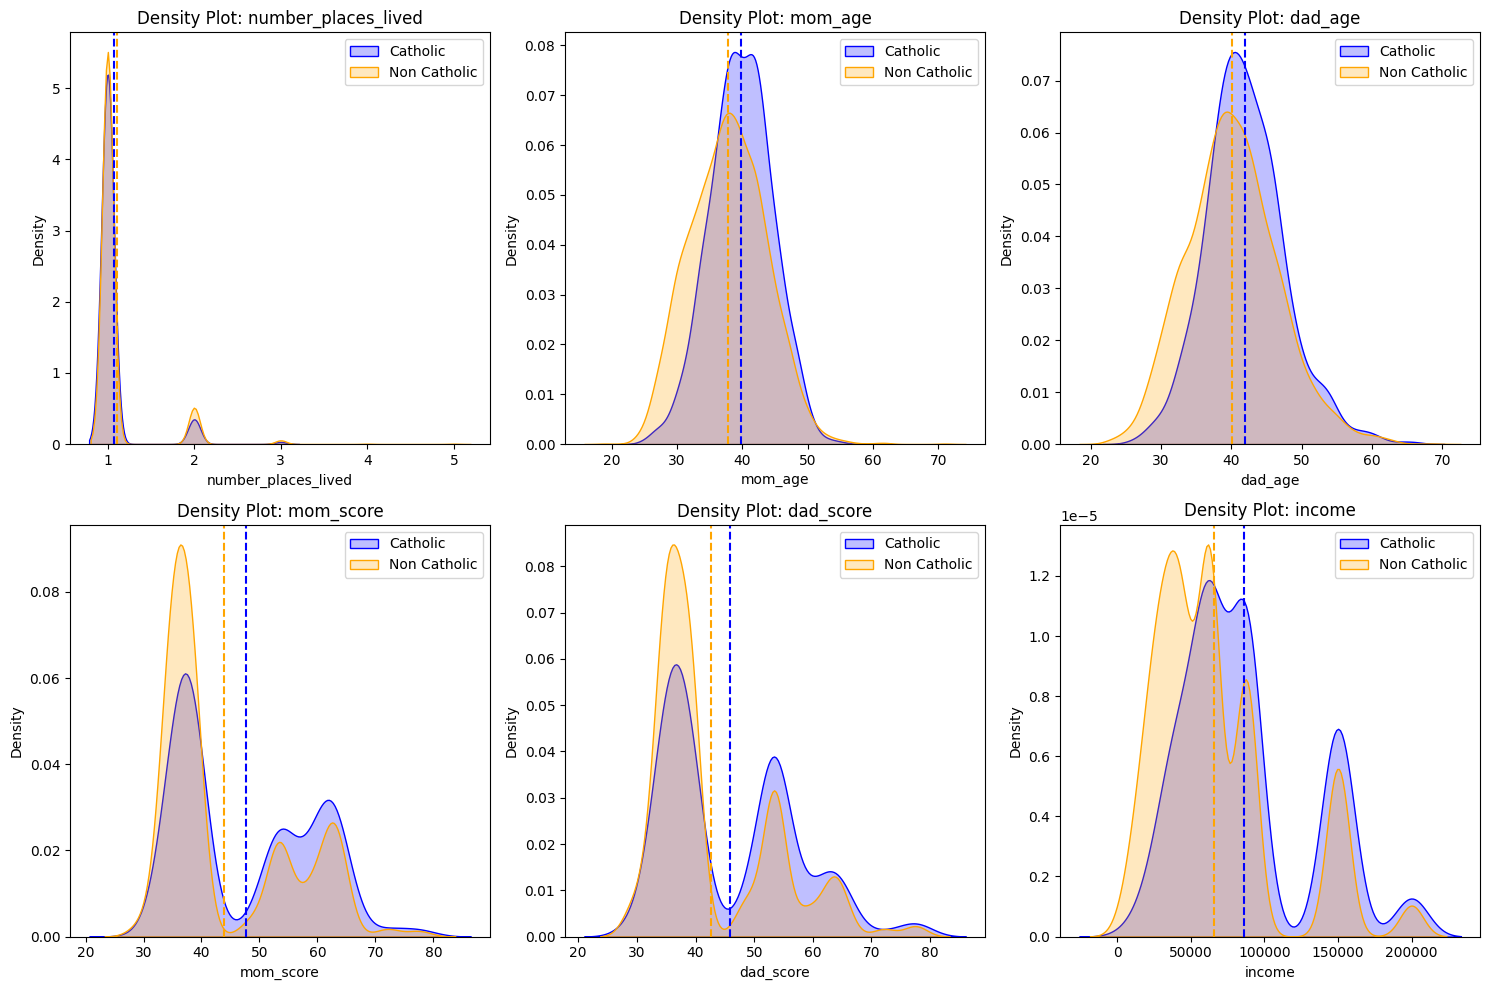

In [9]:
# Visualizing above means with a density plot

cols = ["number_places_lived", "mom_age", "dad_age",
              "mom_score", "dad_score", "income"]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i in range(6):
    col = cols[i]
    catholic = df[df['catholic'] == 1][col]
    non_catholic = df[df['catholic'] == 0][col]
    
    sns.kdeplot(catholic, fill=True, label='Catholic', ax=ax[i], color='blue')
    sns.kdeplot(non_catholic, fill=True, label='Non Catholic', ax=ax[i], color='orange')
    
    # Add vertical lines for means
    ax[i].axvline(catholic.mean(), color='blue', linestyle='--', linewidth=1.5)
    ax[i].axvline(non_catholic.mean(), color='orange', linestyle='--', linewidth=1.5)
    
    ax[i].set_title(f'Density Plot: {col}')
    ax[i].legend()

plt.tight_layout()
plt.show()

This confirms that Catholic vs. Non-Catholic groups are not directly comparable yet. As there is a difference in the means of the group.

# Lets do t-test to make sure that the means are different 

In [10]:
cols

['number_places_lived',
 'mom_age',
 'dad_age',
 'mom_score',
 'dad_score',
 'income']

In [11]:
# Get the continuous variables
# storing results

ttest_metric = []

for col in cols:
    # group by the column based on the treatment
    group1 = df[df['catholic'] == 0][col]
    group2 = df[df['catholic'] == 1][col]
    
    
    t_stat, p_val = ss.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
    # store the value 
    ttest_metric.append([t_stat, p_val])

ttests = pd.DataFrame(ttest_metric, columns=["t_test_stats", "p_value"], index=cols)
ttests["significant"] = ttests["p_value"] < 0.05

display(ttests)


,t_test_stats,p_value,significant
number_places_lived,3.128026,1.791557e-03,True
mom_age,-11.207424,4.283437e-28,True
dad_age,-8.992675,7.153552e-19,True
mom_score,-8.822825,3.491297e-18,True
dad_score,-8.284783,2.943467e-16,True
income,-13.237731,1.212805e-37,True


# Lets look at the binary variables 

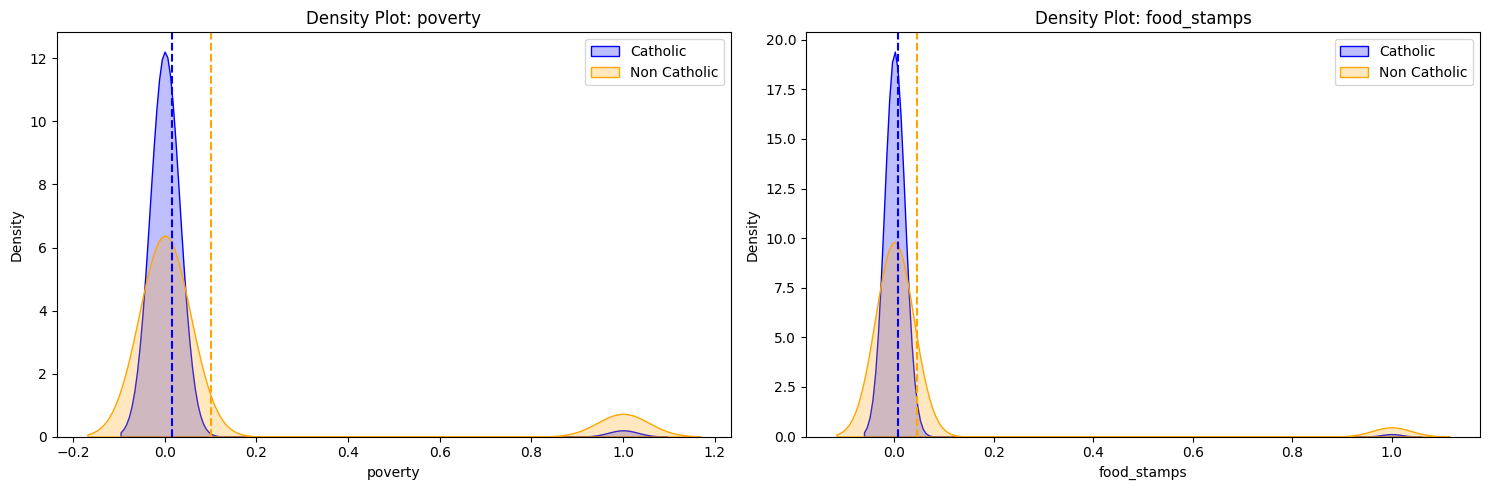

In [12]:
cols = ["poverty", "food_stamps"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

for i in range(2):
    col = cols[i]
    catholic = df[df['catholic'] == 1][col]
    non_catholic = df[df['catholic'] == 0][col]
    
    sns.kdeplot(catholic, fill=True, label='Catholic', ax=ax[i], color='blue')
    sns.kdeplot(non_catholic, fill=True, label='Non Catholic', ax=ax[i], color='orange')
    
    # Add vertical lines for means
    ax[i].axvline(catholic.mean(), color='blue', linestyle='--', linewidth=1.5)
    ax[i].axvline(non_catholic.mean(), color='orange', linestyle='--', linewidth=1.5)
    
    ax[i].set_title(f'Density Plot: {col}')
    ax[i].legend()

plt.tight_layout()
plt.show()

# Perform chi-square test on the variables

In [13]:
cols

['poverty', 'food_stamps']

In [14]:
chi_metrics = []

#loop
for col in cols:
    tab = pd.crosstab(index = df[col], columns = df.catholic)
    stat, p, _, _ = ss.chi2_contingency(tab)
    chi_metrics.append([stat, p])
    
chisquare = pd.DataFrame(chi_metrics, columns=["chi2_stats", "p_value"], index=cols)
chisquare["significant"] = chisquare["p_value"] < 0.05

display(chisquare)

,chi2_stats,p_value,significant
poverty,69.815670,6.511355e-17,True
food_stamps,30.526039,3.294153e-08,True


# Data Prep for Logistic regression

There are 9 categories in the object columns, lets reduce the granularity in order to reduce the number of columns when we use get_dummies

In [15]:
cols = ["race", "dad_education", "mom_education"]

for col in cols:
    display(df[col].value_counts())
    print("-" * 50)
    print()

race
WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: count, dtype: int64

--------------------------------------------------



dad_education
HIGH SCHOOL DIPLOMA/EQUIVALENT            1524
SOME COLLEGE                              1344
BACHELOR'S DEGREE                         1026
9TH - 12TH GRADE                           355
MASTER'S DEGREE (MA, MS)                   354
VOC/TECH PROGRAM                           306
DOCTORATE OR PROFESSIONAL DEGREE           224
8TH GRADE OR BELOW                         167
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     129
Name: count, dtype: int64

--------------------------------------------------



mom_education
SOME COLLEGE                              1721
HIGH SCHOOL DIPLOMA/EQUIVALENT            1306
BACHELOR'S DEGREE                         1085
MASTER'S DEGREE (MA, MS)                   387
VOC/TECH PROGRAM                           294
9TH - 12TH GRADE                           222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     170
8TH GRADE OR BELOW                         134
DOCTORATE OR PROFESSIONAL DEGREE           110
Name: count, dtype: int64

--------------------------------------------------



In [16]:
# Transforming race variable
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') | 
                               (df.race == 'HISPANIC, RACE SPECIFIED'), 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0)

# Transforming education variable
df["dad_higher_education"] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                      (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)
df["mom_higher_education"] = np.where((df.mom_education == "BACHELOR'S DEGREE") |
                                      (df.mom_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)

# Clean the df
df = df.drop(columns = ["race", "dad_education", "mom_education"])
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0


In [17]:
df.head()

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,1,47,45,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0
1,0,1,41,48,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0,1,0
2,0,1,43,55,63.43,53.5,62500.5,0,0,0.490611,1,0,0,0,1,0
3,1,1,38,39,53.50,53.5,87500.5,0,0,1.451278,1,0,0,0,1,0
4,0,1,47,57,61.56,77.5,150000.5,0,0,2.595699,1,0,0,0,1,1


# Isolate, treatment, confounders and y

In [18]:
selected_vars = [
    "mom_age", "mom_score", "dad_score", "income", "poverty", 
    "food_stamps", "race_white", "race_hispanic", "mom_higher_education"
]
treat = df['catholic']
confounders = df.loc[:, selected_vars]
y = df['score_standardized']

# Logistic Regression

In [19]:
# Design pipeline to build the treatment estimator
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', LogisticRegression())
])

# Fit the model

In [20]:
pipe.fit(confounders, treat)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression())])

# predictions

In [21]:
predictions = pipe.predict_proba(confounders)
predictions_binary = pipe.predict(confounders)

In [22]:
predictions[: 4]

array([[0.72991592, 0.27008408],
       [0.83188014, 0.16811986],
       [0.77206722, 0.22793278],
       [0.79676745, 0.20323255]])

In [23]:
predictions_binary[: 4]

array([0, 0, 0, 0], dtype=int64)

# Metrics 

## Confusion matrix

In [24]:
print(metrics.confusion_matrix(treat, predictions_binary))
tn, fp, fn, tp = metrics.confusion_matrix(treat, predictions_binary).ravel()

[[4497    2]
 [ 930    0]]


## Classification report

In [25]:
print(metrics.classification_report(treat, predictions_binary))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4499
           1       0.00      0.00      0.00       930

    accuracy                           0.83      5429
   macro avg       0.41      0.50      0.45      5429
weighted avg       0.69      0.83      0.75      5429



In [26]:
# convert predictions to log scale

def logit(p):
    if p == 0:
        p = 1e-6
    logit_value = math.log(p / (1-p))
    return logit_value

    
predictions_logit = np.array([logit(xi) for xi in predictions[:, 1]])

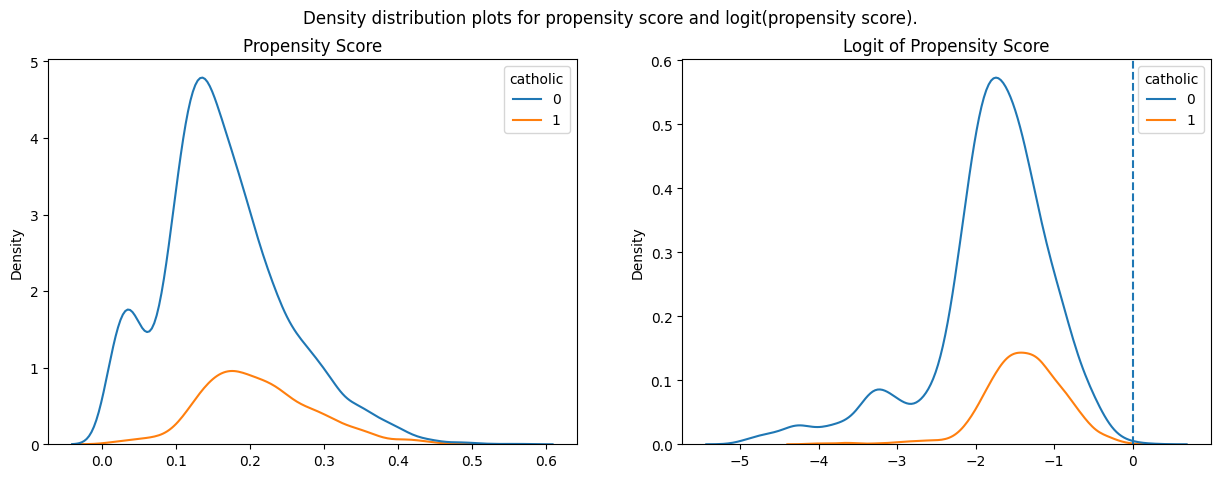

In [27]:
# Density distribution of propensity score (logic) broken down by treatment status
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Density distribution plots for propensity score and logit(propensity score).')
sns.kdeplot(x = predictions[:,1], hue = treat , ax = ax[0])
ax[0].set_title('Propensity Score')

sns.kdeplot(x = predictions_logit, hue = treat , ax = ax[1])
ax[1].axvline(0, ls='--')
ax[1].set_title('Logit of Propensity Score')
plt.show()

In [28]:
common_support = (predictions_logit > -4.5) & (predictions_logit < 0)

In [29]:
df.loc[:,'propensity_score'] = predictions[:,1]
df.loc[:,'propensity_score_logit'] = predictions_logit
df.loc[:,'outcome'] = y.values

confounders.loc[:,'propensity_score'] = predictions[:,1]
confounders.loc[:,'propensity_score_logit'] = predictions_logit
confounders.loc[:,'outcome'] = y.values
confounders.loc[:,'treatment'] = treat.values

# Matching Implementation

In [30]:
caliper = np.std(df.propensity_score) * 0.25

print('\nCaliper (radius) is: {:.4f}\n'.format(caliper))

df = confounders

knn = NearestNeighbors(n_neighbors=10 , p = 2, radius=caliper)
knn.fit(df[['propensity_score_logit']].to_numpy())


Caliper (radius) is: 0.0212



NearestNeighbors(n_neighbors=10, radius=0.021176550788730986)

For each data point (based on the logit propensity score) obtain (at most) 10 nearest matches. This is regardless of their treatment status.

In [31]:
# Common support distances and indexes
distances, indexes = knn.kneighbors(
    df[['propensity_score_logit']].to_numpy(), n_neighbors=10)

In [32]:
print('For item 0, the 4 closest distances are (first item is self):')

for ds in distances[0,0:4]:
    print('Element distance: {:4f}'.format(ds))
print('...')

For item 0, the 4 closest distances are (first item is self):
Element distance: 0.000000
Element distance: 0.001191
Element distance: 0.001192
Element distance: 0.001535
...


In [33]:
print('For item 0, the 4 closest indexes are (first item is self):')
for idx in indexes[0,0:4]:
    print('Element index: {}'.format(idx))
print('...')

For item 0, the 4 closest indexes are (first item is self):
Element index: 0
Element index: 3890
Element index: 349
Element index: 3891
...


In [34]:
def perfom_matching_v2(row, indexes, df_data):
    current_index = int(row['index']) # Obtain value from index-named column, not the actual DF index.
    prop_score_logit = row['propensity_score_logit']
    for idx in indexes[current_index,:]:
        if (current_index != idx) and (row.treatment == 1) and (df_data.loc[idx].treatment == 0):
            return int(idx)
         
df['matched_element'] = df.reset_index().apply(perfom_matching_v2, axis = 1, args = (indexes, df))

In [35]:
treated_with_match = ~df.matched_element.isna()

In [36]:
treated_matched_data = df[treated_with_match][df.columns]
treated_matched_data.head(3)

,mom_age,mom_score,dad_score,income,poverty,food_stamps,race_white,race_hispanic,mom_higher_education,propensity_score,propensity_score_logit,outcome,treatment,matched_element
3,38,53.50,53.50,87500.5,0,0,1,0,0,0.203233,-1.366212,1.451278,1,408.0
21,41,57.83,35.78,150000.5,0,0,1,0,0,0.268141,-1.004074,1.485352,1,2886.0
22,35,53.50,63.43,87500.5,0,0,1,0,1,0.221843,-1.254956,-0.501969,1,466.0


In [37]:
def obtain_match_details(row, all_data, attribute):
    return all_data.loc[row.matched_element][attribute]

untreated_matched_data = pd.DataFrame(data = treated_matched_data.matched_element)

attributes = treated_matched_data.columns[: -1]

for attr in attributes:
    untreated_matched_data[attr] = untreated_matched_data.apply(obtain_match_details, axis = 1, all_data = df, attribute = attr)
    
untreated_matched_data = untreated_matched_data.set_index('matched_element')
untreated_matched_data.head(3)

,mom_age,mom_score,dad_score,income,poverty,food_stamps,race_white,race_hispanic,mom_higher_education,propensity_score,propensity_score_logit,outcome,treatment
matched_element,,,,,,,,,,,,,
408.0,38.0,53.50,53.5,87500.5,0.0,0.0,1.0,0.0,0.0,0.203233,-1.366212,0.728410,0.0
2886.0,50.0,38.18,53.5,87500.5,0.0,0.0,1.0,0.0,0.0,0.268208,-1.003733,-0.346936,0.0
466.0,39.0,52.54,59.0,62500.5,0.0,0.0,1.0,0.0,1.0,0.221785,-1.255294,0.004615,0.0


In [38]:
untreated_matched_data.shape

(930, 13)

In [39]:
treated_matched_data.shape

(930, 14)

In [40]:
all_mached_data = pd.concat([treated_matched_data, untreated_matched_data])

In [41]:
all_mached_data.treatment.value_counts()

treatment
1.0    930
0.0    930
Name: count, dtype: int64

# Matching review

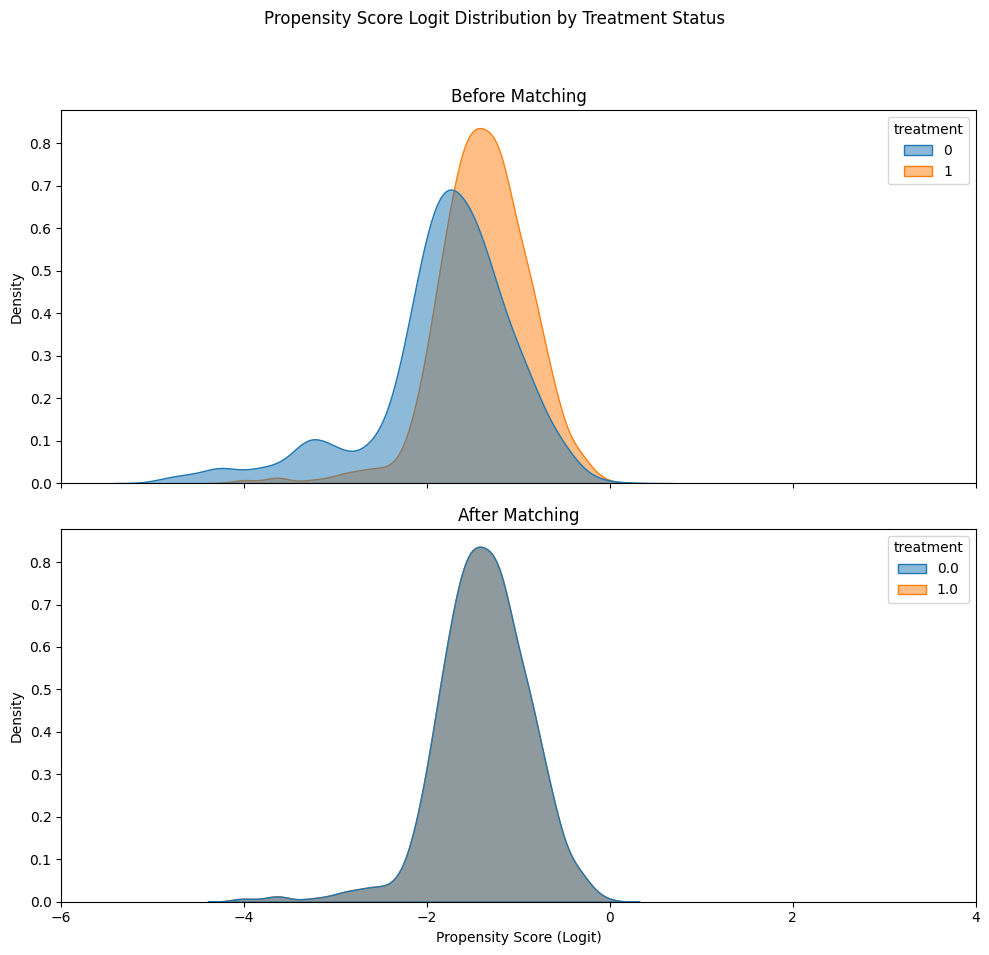

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Propensity Score Logit Distribution by Treatment Status')

# Before Matching
sns.kdeplot(data=df, x='propensity_score_logit', hue='treatment', ax=axes[0], fill=True, common_norm=False, alpha=0.5)
axes[0].set_title('Before Matching')
axes[0].set_xlim(-6, 4)
axes[0].set_ylabel('Density')

# After Matching
sns.kdeplot(data=all_mached_data, x='propensity_score_logit', hue='treatment', ax=axes[1], fill=True, common_norm=False, alpha=0.5)
axes[1].set_title('After Matching')
axes[1].set_xlabel('Propensity Score (Logit)')
axes[1].set_ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


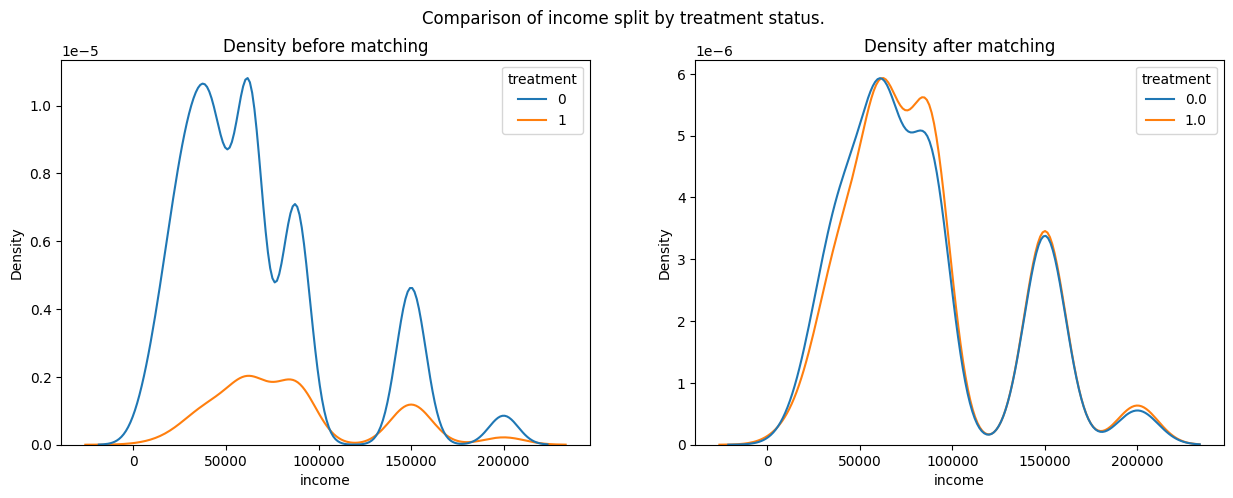

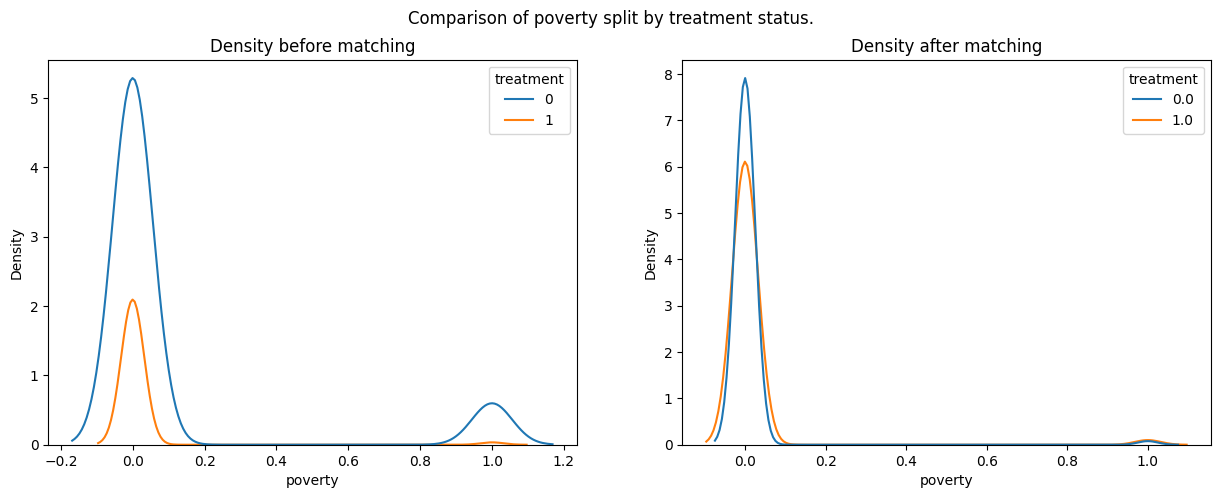

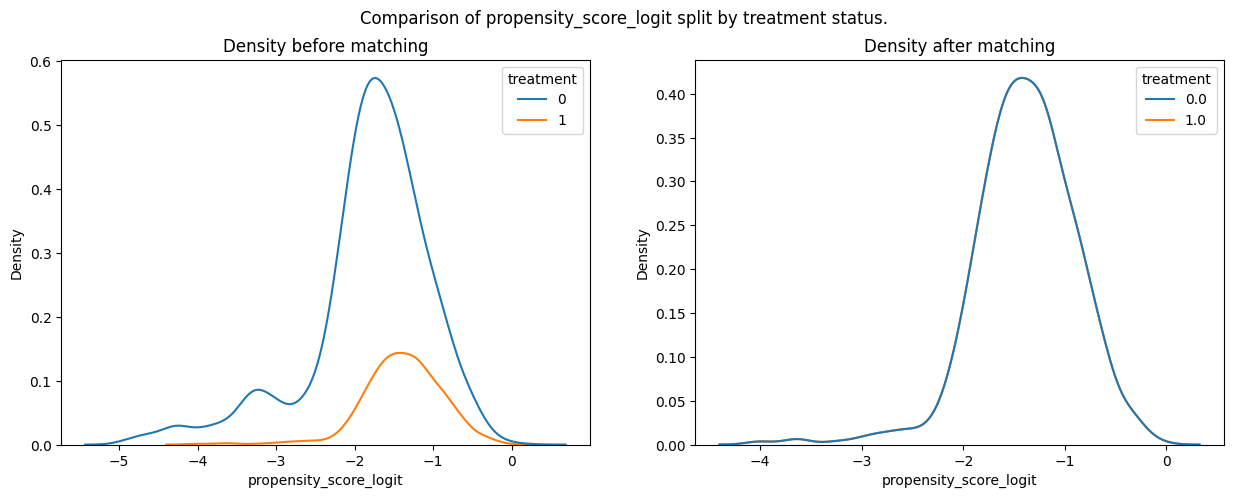

In [43]:
args = ['income','poverty','propensity_score_logit']

def plot(arg):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    fig.suptitle('Comparison of {} split by treatment status.'.format(arg))
    sns.kdeplot(data = df, x = arg, hue = 'treatment', ax = ax[0]).set(title='Density before matching')
    sns.kdeplot(data = all_mached_data, x = arg, hue = 'treatment',  ax = ax[1]).set(title='Density after matching')
    plt.show()
    fig.savefig("{}_comparison.png".format(arg))

for arg in args:
    plot(arg)

In [44]:
points_df = pd.merge(treated_matched_data[['income','mom_age','matched_element']], 
                     df[['income','mom_age']], 
                     how = 'right',  
                     left_on = 'matched_element', 
                     right_index=True)

In [45]:
overview = all_mached_data[['outcome', 'treatment']].groupby('treatment').agg(['mean', 'var', 'std', 'count'])
print(overview)

            outcome                          
               mean       var       std count
treatment                                    
0.0        0.424632  0.878602  0.937338   930
1.0        0.219685  0.735995  0.857902   930


In [46]:
treated_outcome = overview['outcome']['mean'][1]
treated_counterfactual_outcome = overview['outcome']['mean'][0]

In [47]:
att = treated_outcome - treated_counterfactual_outcome
print('The Average Treatment Effect (ATT): {:.4f}'.format(att))

The Average Treatment Effect (ATT): -0.2049
